In [1]:
from html_scraper import main
# main()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy

In [2]:
power = pd.read_csv("podatki/tier_list.csv")
strategije = pd.read_csv("podatki/top_decks.csv")
vse_karte = pd.read_csv("podatki/total_cards.csv")

# Analiza podatkov

Analiziral sem strategije in posamezne karte pri igri Yu-Gi-Oh!.

Igra Yu-Gi-Oh! se igra z zbiri v velikosti med 40 in 60 kart, pri čemer je vse skupaj na voljo več kot 10.000 različnih kart. Vsak igralec svoj zbir (kupček, s tujko deck) načrtuje na osnovi raznih strategij in posameznih močnih kart, s katerimi poskuša zmagati posamezno igro. Posamezen zbir lahko vsebuje poljubno kombinacijo kart. Karte, ki so tematsko povezane in medsebojno potrebne za svoje delovanje predstavljajo neko strategijo. 

Za to analizo sem snel podatke s spletne strani [Master Duel Meta](https://www.masterduelmeta.com/), ki ima zbrane podatke o uspešnosti raznih strategij. Hrani tudi sezname zbirov, ki jih na njej objavljajo uporabniki.

### Najboljše strategije

Moč strategije je v viru ocenjena na podlagi njene uspešnosti na raznih spletnih turnirjih. Nato so na isti način ravrščene še v range oziroma stopnje moči. To pomeni, da lestvica ne predstavlja le učinkovitosti strategije, ampak delno tudi njeno priljubljenost. Bolj igrane strategije imajo večjo verjetnost, da se boljše uvrstijo.

In [26]:
# Polepšanje tabele 
power["stopnja"] = power["stopnja"].apply(int)
if type(power["moč"][0]) == numpy.float64:
    power["moč"] = power["moč"].apply("{:.1f}".format)

display(power.style.hide())
print(f'Tabela kaže, da sta trenutno dve najboljši strategiji \x1B[3m{power["ime strategije"][0]}\x1B[0m in \x1B[3m{power["ime strategije"][1]}\x1B[0m.')

ime strategije,moč,stopnja
Yubel,22.5,1
Snake-Eye Fire King,19.0,1
Branded,7.5,2
Snake-Eye,5.0,3
Tearlaments,5.0,3
Voiceless Voice,4.0,3
Rescue-ACE,3.0,3


Tabela kaže, da sta trenutno dve najboljši strategiji Yubel in Snake-Eye Fire King.


### Priljubljenost strategij

Na spletni strani se nahajajo zbiri, ki so jih naložili uporabniki v zadnjih dveh tednih. Za vsak zbir imamo podatek, katero strategijo ta zbir uporablja. Iz števila objavljenih zbirov lahko sklepamo na priljibljenost strategij. Običajno so popularne strategija tudi najboljše. 

In [6]:
strategije.head(15)

,ime strategije,število zbirov
0,Voiceless Voice,48
1,Yubel,48
2,Snake-Eye Fire King,31
3,Tearlaments,19
4,Branded,18
5,Ice Barrier,18
6,Raidraptor,13
7,Stun,13
8,Centur-Ion,11
9,Labrynth,10


Če primerjamo zgornji dve tabeli ugotovimo, da so najboljše strategije tudi tiste, ki imajo objavljenih največ zbirov, se pravi so priljubljene. Pri tem izstopa nova strategija *Voiceless Voice*, ki ni med najuspešnejšimi, a je vseeno zelo priljubljena.

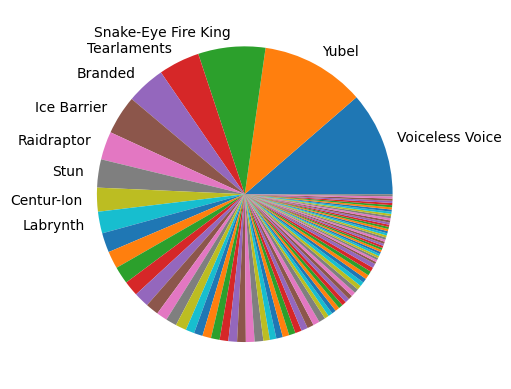

V zadnjih dveh tednih je bilo objavljeih 88 različnih strategij. Pri tem 9 najbolj priljubljenih (10.23 %) strategij predstavlja 51.90 odstotkov vseh objavljenih zbirov


In [48]:
# Ohrani samo značnko za strategije, ki imajo vsaj 10 zbirov
strategije2 = strategije
labele = []
for i in range(len(strategije2["število zbirov"])):
    if strategije2["število zbirov"].iloc[i] >= 10:
        labele.append(strategije2["ime strategije"].iloc[i])
    else:
        labele.append(None)

# Šteje sptemenljivke za f-stavek
total = 0
for num in strategije["število zbirov"]:
    total += num

a = 0
i = 0
while a < total/2:
    a += strategije["število zbirov"].iloc[i]
    i += 1

proc1 = "{:.2f}".format(100 * a / total)
proc2 = "{:.2f}".format(100 * i / len(strategije["ime strategije"]))

strategije2["število zbirov"].plot.pie(ylabel="", labels=labele)
plt.show()
print(f'V zadnjih dveh tednih je bilo objavljeih {len(strategije["ime strategije"])} različnih strategij.' +
      f' Pri tem {i} najbolj priljubljenih ({proc2} %) strategij predstavlja {proc1} odstotkov vseh objavljenih zbirov')


Iz tortnega diagrama je razvidno, da uporabniki objavljajo veliko število raznolikih strategij.

### Frekveca pojavitve posameznih kart

In [45]:
x = 0
for num in strategije["število zbirov"]:
    x += num
print(f'V zadnjih dveh tednih je bilo naloženih {x} zbirov.')

V zadnjih dveh tednih je bilo naloženih 422 zbirov.


Med vsemi temi zbiri imamo približno 20.000 kart, od tega okoli 1500 različnih. Posamezna karta je v nekem zbiru lahko v največ treh kopijah. Za posamezno karto preverimo, kalikokrat se je pojavila v vseh zbirih ter v koliko različnih zbirih se nahaja. Igra Yu-Gi-Oh! posamezen zbir kart dodatno deli še na glavni zbir (main deck) in dodatni zbir (extra deck). To predstavlja dve medsebojno ekskluzivni lokaciji, kjer se posamezna karta lahko nahaja.

Te podatke si lahko ogledamo v tabeli s tremi relativnimi vrednostmi. Prvi stolpec predstavlja povprečno število kopij te karte v vsakem zbiru (povprečna absolutna množina). Drugi stolpec predstavlja povprečno število kopij te karte v tistih zbirih, ki uporabljajo vsaj eno kopijo te karte (povprečna relativna množina). Tretji stolpec je verjetnost, da se karta v posameznem zbiru pojavi v vsaj eni kopiji (povprečna prisotnost). Dodatno so vrstice tabele še obarvane glede na lokacijo, na kateri se karta nahaja.

In [11]:
'''Prikaže tabelo kart s 3 stolpci + imena + lokacija 
1 - št. pojavitev/št. strategij 
2 - št. pojavitev/zbiri, kjer se pojavi vsaj enkrat
3 - št. zbirov kjer se pojavi/št. strategij'''

st_zbirov = 0
for num in strategije["število zbirov"]:
    st_zbirov += num

st_1 = "povprečna absolutna množina"
st_2 = "povprečna relativna množina"
st_3 = "povprečna prisotnost [%]"

vse_karte_proc = vse_karte.copy()
vse_karte_proc = vse_karte_proc.rename(columns={"število pojavitev": st_1, "število zbirov": st_2, "lokacija": st_3})

vse_karte_proc[st_1] = vse_karte["število pojavitev"] / st_zbirov
vse_karte_proc[st_1] = vse_karte_proc[st_1].apply("{:.3f}".format)

vse_karte_proc[st_2] = vse_karte["število pojavitev"] / vse_karte["število zbirov"]
vse_karte_proc[st_2] = vse_karte_proc[st_2].apply("{:.3f}".format)

vse_karte_proc[st_3] = 100 * vse_karte["število zbirov"] / st_zbirov

vse_karte_proc["lokacija"] = vse_karte["lokacija"]

def barvica(x):
    if x["lokacija"] == "main":
        return ['background-color: darkblue']*5
    else:
        return ['background-color: darkred']*5

Podatki urejeni po velikosti padajoče po stolpcu povprečna absolutna množina:

In [12]:
vse_karte_proc.sort_values(by=st_1, ascending=False).head(15).style.apply(barvica, axis=1).hide()

karta,povprečna absolutna množina,povprečna relativna množina,povprečna prisotnost [%],lokacija
Infinite Impermanence,2.320,2.750,84.360190,main
"Maxx ""C""",2.092,2.973,70.379147,main
Ash Blossom & Joyous Spring,1.950,2.929,66.587678,main
Called by the Grave,1.502,1.994,75.355450,main
Evenly Matched,1.076,2.609,41.232227,main
Droll & Lock Bird,0.746,2.500,29.857820,main
Triple Tactics Talent,0.704,1.580,44.549763,main
S:P Little Knight,0.673,1.072,62.796209,extra
Effect Veiler,0.607,2.169,27.962085,main
Crossout Designator,0.509,1.000,50.947867,main


Podatki urejeni po velikosti padajoče po stolpcu povprečna prisotnost:

In [13]:
vse_karte_proc.sort_values(by=st_3, ascending=False).head(15).style.apply(barvica, axis=1).hide()

karta,povprečna absolutna množina,povprečna relativna množina,povprečna prisotnost [%],lokacija
Infinite Impermanence,2.320,2.750,84.360190,main
Called by the Grave,1.502,1.994,75.355450,main
"Maxx ""C""",2.092,2.973,70.379147,main
Ash Blossom & Joyous Spring,1.950,2.929,66.587678,main
S:P Little Knight,0.673,1.072,62.796209,extra
Crossout Designator,0.509,1.000,50.947867,main
Triple Tactics Talent,0.704,1.580,44.549763,main
Pot of Prosperity,0.434,1.000,43.364929,main
Evenly Matched,1.076,2.609,41.232227,main
Super Starslayer TY-PHON - Sky Crisis,0.336,1.084,31.042654,extra


Prvi in tretji stolpec kažeta podobne rezultate. Izstopata karti *Max "C"* in *Ash Blossom & Joyous Spring*, ki sta skoraj vedno igrani v treh kopijah. Povprečna relativna množina kart kot so *Called by the Grave*, *Crossout Designator* in *Pot of Prosperity* je posledica tega, da je dovoljeno število teh kart v enem zbiru dodatno omejeno.

Urediti podatke po povprečni relativni množini samo po sebi na da zanimivih rezultatov, saj prevladujejo karte, ki se pojavijo v le enem zbiru v treh ali eni kopiji. Zato karte najprej uredimo po prvem stolpcu padajoče in nato po drugem stolpcu naraščujoče. 

In [14]:
vse_karte_proc.sort_values([st_2, st_1], ascending=[True, False]).head(15).style.apply(barvica, axis=1).hide()

karta,povprečna absolutna množina,povprečna relativna množina,povprečna prisotnost [%],lokacija
Crossout Designator,0.509,1.000,50.947867,main
Pot of Prosperity,0.434,1.000,43.364929,main
Harpie's Feather Duster,0.282,1.000,28.199052,main
Baronne de Fleur,0.268,1.000,26.777251,extra
Pot of Extravagance,0.263,1.000,26.303318,main
Accesscode Talker,0.225,1.000,22.511848,extra
"Apollousa, Bow of the Goddess",0.213,1.000,21.327014,extra
PSY-Frame Driver,0.209,1.000,20.853081,main
Worldsea Dragon Zealantis,0.199,1.000,19.905213,extra
Bystial Magnamhut,0.197,1.000,19.668246,main


Če izključimo karte, katerih dovoljeno število je dodatno omejeno (med prikazanimi so to vse z modro obarvane razen *PSY-Frame Driver*), na vrhu tabele začnejo prevladovati karte iz dodatnega zbira. Ko imajo igralci na voljo igrati več kopij neke karte, se v samo eni kopiji igrajo predvsem karte iz dodatnega zbira.

In [50]:
# Primerja število vseh popularnih kart iz dodatnega zbira s tem, v koliko zbirih so
#1.068
vse_karte5 = vse_karte[(vse_karte["število zbirov"] > 70) & (vse_karte["lokacija"] == "extra")].sort_values(by="število zbirov", ascending=False).copy()
suma = 0
for i in range(len(vse_karte5["karta"])):
    suma += vse_karte5["število pojavitev"].iloc[i]/vse_karte5["število zbirov"].iloc[i]
povprecje = "{:.3f}".format(suma/len(vse_karte5["karta"]))

print(f"Med kartami, ki so v dodatnem zbiru, se te povrečno pojavijo v {povprecje} kopijah, torej se v veliki večini igrajo v eni kopiji.")

Med kartami, ki so v dodatnem zbiru, se te povrečno pojavijo v 1.067 kopijah, torej se v veliki večini igrajo v eni kopiji.


#### Graf števila zbirov

Graf prikazuje v kolikih zbirih je posamezna karta. Karte so urejen po padajočem štetvilu zbirov, v katerih se nahajajo.

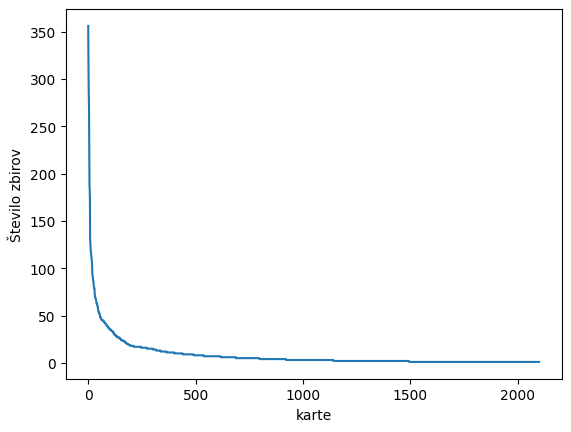

In [51]:
vse_karte2 = vse_karte.sort_values(by="število zbirov", ascending=False).copy()
vse_karte2 = vse_karte2.reset_index()
vse_karte2["število zbirov"].plot(ylabel="Število zbirov", xlabel="karte")
plt.show()

#### Graf števila pojavitev

Graf prikazuje kolikokrat se je pojavila posamezna karta. Urejene so po padajočem številu pojavitev.

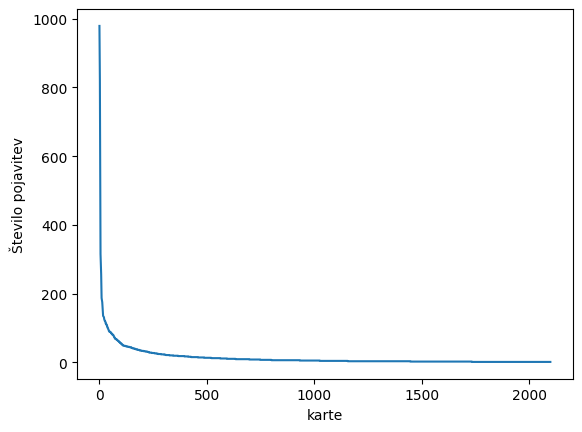

In [52]:
vse_karte3 = vse_karte.sort_values(by="število pojavitev", ascending=False).copy()
vse_karte3 = vse_karte3.reset_index()
vse_karte3["število pojavitev"].plot(ylabel="Število pojavitev", xlabel="karte")
plt.show()

Grafa pokažeta zelo dolg rep malo igranih kart. Veliko igranih kart je le nekaj. Velika večina opaženih kart se pojavi v majhnem številu in v le nekaj zbirih.

#### Podrobnejši prikaz za karte, ki se pojavijo v vsaj 70 različnih zbirih

Za boljšo preglednost sta grafa približana na samo najbolj igrane karte. Pri tem se z barvo razlikuje še lokacijo kart.

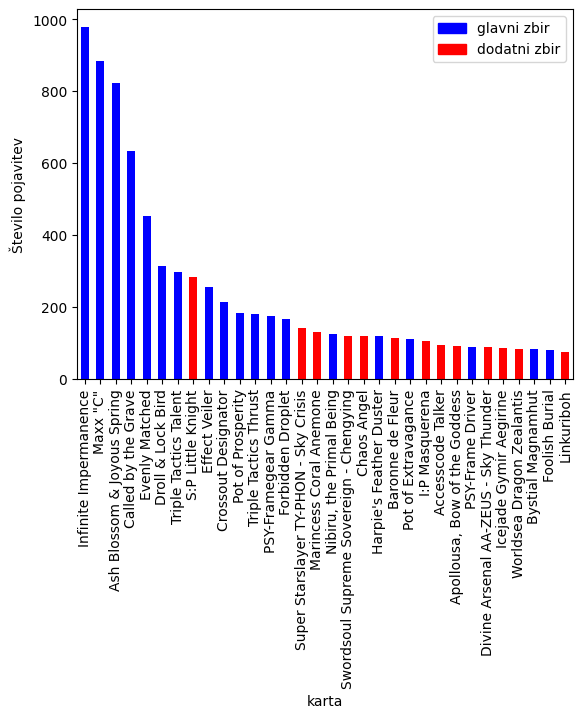

In [55]:
vse_karte3 = vse_karte[vse_karte["število zbirov"] > 70].sort_values(by="število pojavitev", ascending=False).copy()
vse_karte3 = vse_karte3.set_index(vse_karte3["karta"])

# Naredi funkcijo za barvanje stolpcev in podlagi za legendo barv
colors = []
for kje in vse_karte3["lokacija"]:
    if kje == "main":
        colors.append("blue")
    elif kje == "extra":
        colors.append("red")
        
red_patch = mpatches.Patch(color='red')
blue_patch = mpatches.Patch(color='blue')

vse_karte3["število pojavitev"].plot.bar(ylabel="Število pojavitev", rot=90,color=colors) \
    .legend([blue_patch, red_patch],["glavni zbir", "dodatni zbir"])
plt.show()

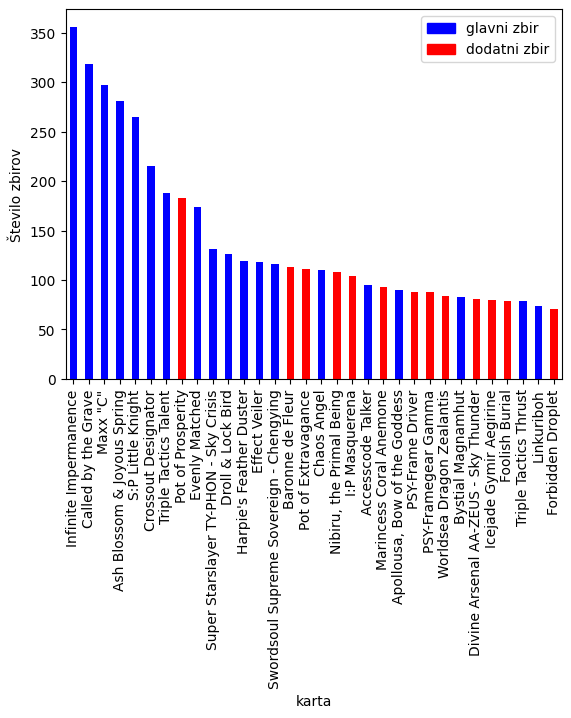

In [57]:
# Zahteva zgornjo celico za barve in legendo
vse_karte4 = vse_karte[vse_karte["število zbirov"] > 70].sort_values(by="število zbirov", ascending=False).copy()
vse_karte4 = vse_karte4.set_index(vse_karte4["karta"])

vse_karte4["število zbirov"].plot.bar(ylabel="Število zbirov", rot=90,color=colors).legend([blue_patch, red_patch],["glavni zbir", "dodatni zbir"])
plt.show()

V obeh grafih opazimo podoben trend, pri čemer so karte na začetku grafa bolj izstopajoče po številu pojavitev, kot pa številu zbirov. Prvih nekaj najpogostejših kart se igra v glavnem zbiru v največjem dovoljenem številu, nato pa postaneta lokacija najpogostejših kart in njihovo število bolj mešana.

#### Histogram za število kart, ki so se pojavile v nekem številu na logaritemski skali.

Prvi histogram prikazuje, koliko kart se je vse skupaj pojavilo x-krat. Drugi histogram kaže, koliko kart se je pojavilo v x zbirih.

array([<Axes: ylabel='Število različnih kart'>,
       <Axes: ylabel='Število različnih kart'>], dtype=object)

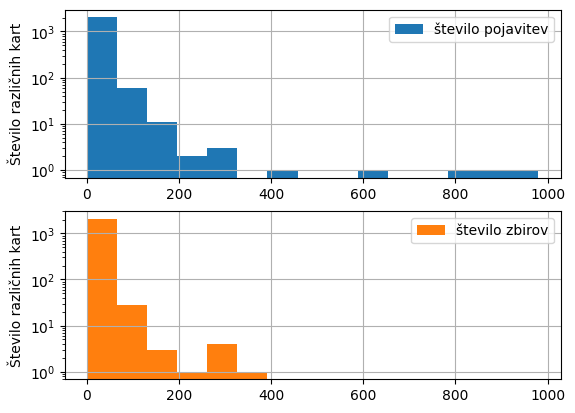

In [20]:
vse_karte.plot.hist(ylabel='Število različnih kart', bins=15, subplots=True, sharex=False, logy=True, grid=True)

Iz histogramov je razvidno, da pride do relativnega povečanja števila različnih kart na skrajnem ekstremu števila pojavitev in zbirov. Torej obstaja znatna količina različnih kart, ki se igra v zelo velikem številu, velika večina kart se pojavi le nekajkrat, najmanj pa je kart, ki se pojavijo nekje med tema ekstremoma.

## Zaključek analize

* Pričakovano imajo najboljše strategije tudi največ objavljenih zbirov. To pravilo ima izjemo, predvsem če je strategija nova in sveža.
* Med najbolj igranimi kartami prevladujejo tiste, ki so iz glavnega zbira. Priljubjene karte iz stranskega zbira, se večinoma igrajo v eni kopiji. 
* Velika večina različnih kart se igra poredko. Nekaj kart se igra zelo pogosto, najmanj kart je med tema ekstremoma.

## "Izposoja" zbira kart

Če hočemo v igri Yu-Gi-Oh! (imeti možnost) biti uspešni, rabimo zbir, ki je iz teoretičnega vidika dobro zasnovan. Najlažji način priti do zbira je, če si "sposodiš" že narejen seznam kart, ki preverjeno dobro deluje. Z analizo smo že ugotovili, katero so najboljše strategije ter katere karte so najbolj priljubljene. Za začetek se omejimo samo na dve najboljši strategiji in poglejmo, koliko zbirov imamo potem na voljo.

In [7]:
power = pd.read_csv("podatki/tier_list.csv")
zbiri = pd.read_csv("podatki/decks.csv")
zbiri2 = zbiri[zbiri["strategija"].isin([power["ime strategije"][0],power["ime strategije"][1]])]
zbiri2.sort_values("strategija").style.hide()

strategija,avtor,zbir,id zbira
Snake-Eye Fire King,Mordred,66bb09a5006e167cbeb5246e.text,66bb09a5006e167cbeb5246e
Snake-Eye Fire King,Denliner,66becf19fe6df1efc6594f88.text,66becf19fe6df1efc6594f88
Snake-Eye Fire King,xMirko777x,66ba7a68247ea4eeda3681be.text,66ba7a68247ea4eeda3681be
Snake-Eye Fire King,Valdo,66becfc90af492099bd3cf8c.text,66becfc90af492099bd3cf8c
Snake-Eye Fire King,Slabador,66bedacdfe630b5eedb2c241.text,66bedacdfe630b5eedb2c241
Snake-Eye Fire King,PanPan,66c3a7bcdd673506b5c1f3e1.text,66c3a7bcdd673506b5c1f3e1
Snake-Eye Fire King,萝卜carrot,66c0bb9b1264aba1bdbfe1e7.text,66c0bb9b1264aba1bdbfe1e7
Snake-Eye Fire King,Bravioli,66b6f0d63651c49c3af73834.text,66b6f0d63651c49c3af73834
Snake-Eye Fire King,Izrob,66b69e802c6f73f9bd668f6f.text,66b69e802c6f73f9bd668f6f
Snake-Eye Fire King,Rixia,66b700413979b23bf58257c6.text,66b700413979b23bf58257c6


Hočemo tudi, da zbir, ki si ga bomo sposodili, vsebuje najbolj priljubljene karte. Uporabimo tabelo pojavitev posabeznih kart, ki smo jo prej analizirali. Če so karte priljubljene, so seveda tudi najboljše!

S spreminjanjem prednosti "n" lahko določite, koliko izmed najbolj priljubljenih kart zahtevamo, da je v zbiru, ki ga bomo izbrali.

In [8]:
n = 7

In [9]:
from deck_creator import allowed_decks

vse_karte = pd.read_csv("podatki/total_cards.csv")
top_karte = vse_karte.sort_values(by="število zbirov", ascending=False).reset_index()

try:
    sez = allowed_decks(zbiri2, top_karte, n)
except Exception:
    sez = allowed_decks(zbiri2, top_karte)

zbiri3 = zbiri2[zbiri2["id zbira"].isin(sez)]

if zbiri3.empty:
    print("Izgleda, da kriterijem ne ustreza noben zbir.")
else:
    display(zbiri3.style.hide())

strategija,avtor,zbir,id zbira
Yubel,! Modar,66b57c94d97a3ef024d23081.text,66b57c94d97a3ef024d23081
Yubel,Yotsuba,66b6fe205800fb03b8fd1bc2.text,66b6fe205800fb03b8fd1bc2
Yubel,dddlv21,66b843ff9a036ef038863501.text,66b843ff9a036ef038863501
Yubel,terrencegrey,66b99050d65de24bb3e820f6.text,66b99050d65de24bb3e820f6
Yubel,Lightning,66baeb5409ff66061d2ea345.text,66baeb5409ff66061d2ea345
Snake-Eye Fire King,Valdo,66becfc90af492099bd3cf8c.text,66becfc90af492099bd3cf8c
Yubel,Highwind,66bed017fe6df1efc6597ba5.text,66bed017fe6df1efc6597ba5
Snake-Eye Fire King,萝卜carrot,66c0bb9b1264aba1bdbfe1e7.text,66c0bb9b1264aba1bdbfe1e7
Yubel,AbdUllah,66c156ac3bfbe3bd06dc52a5.text,66c156ac3bfbe3bd06dc52a5
Yubel,Douma,66c248103d85a10d27e245f8.text,66c248103d85a10d27e245f8


Recimo si izberemo prvega od teh zbirov in si ga ogledamo. S spreminjanjem vrednosti spremenjlivek "st_zbira" lahko izberete tudi drugega od preostalih zbirov.

In [10]:
st_zbira = 0

from deck_creator import printer

printer(zbiri3,st_zbira)

Strategija: Yubel Avtor: !                          Modar

#main
PSY-Frame Driver x1
Chaos Summoning Beast x1
Gruesome Grave Squirmer x2
Samsara D Lotus x3
Maxx "C" x3
PSY-Framegear Gamma x2
Dark Beckoning Beast x3
Ash Blossom & Joyous Spring x3
Unchained Soul of Sharvara x1
Yubel x1
Spirit of Yubel x3
Yubel - Terror Incarnate x1
Nibiru, the Primal Being x2
One for One x1
Triple Tactics Talent x1
Nightmare Throne x3
Opening of the Spirit Gates x2
Nightmare Pain x2
Super Polymerization x3
Called by the Grave x2
Crossout Designator x1
Infinite Impermanence x3
Escape of the Unchained x1
Eternal Favorite x1

#extra
Mudragon of the Swamp x1
Garura, Wings of Resonant Life x1
Phantom of Yubel x3
Yubel - The Loving Defender Forever x1
Super Starslayer TY-PHON - Sky Crisis x1
Unchained Soul Lord of Yama x1
Salamangreat Almiraj x1
Unchained Soul of Rage x1
Cross-Sheep x1
S:P Little Knight x1
Borrelsword Dragon x1
Apollousa, Bow of the Goddess x1
Accesscode Talker x1

!side


Zdaj si želimo ta zbir še prenesti v uporabno datoteko. Med igralci igre Yu-Gi-Oh! se je uveljavil neuraden datotečni format .ydk. Preprosto vsebuje serijske številke kart razdeljene na različne dele zbira. To datoteko lahko naložimo v vse (neuradne) digitalne simulatorje igre. Za pridobivanje serijskih števil se poslužimo API-ja spletne strani [YGOPRODeck](https://ygoprodeck.com/), ki omogoča dostop do vseh podatkov o karti na podlagi njenega točnega imena. Ime datoteke je nastavljeno na "Moj_zbir.ydk".

In [14]:
datoteka = "Moj_zbir.ydk"

text_file = zbiri3["zbir"].iloc[st_zbira]
from deck_creator import make_ydk
make_ydk(text_file, datoteka)